# EE-411 Fundamentals of inference and learning, EPFL 
## Exercice Session 2: optimizing functions using scipy

In this second set of exercices, we will solve the so-called *Lighthouse problem*, which serves as a perfect opportunity to introduce a very useful package for scientific computing, called **scipy**.

**What you will learn today:** In this second session, we will discuss how to use **scipy** to generate random data according to a certain distribution and to minimize 1D and 2D functions. Furthermore, we will have a first-hand application of some concepts explained in the second lecture, such as the maximal likelihood estimator, Cramér–Rao bound and Jeffreys prior.


# The Lighthouse problem 

**Locating the lighthouse**

A lighthouse is located somewhere off a piece of straight coastline at a position $\alpha$ (or $x_0$) along the shore and a distance $\beta$ (or $y_0$) out at sea. It emits a series of short highly collimated flashes at random intervals and hence at random azimuths. These pulses are intercepted on the coast by photo-detectors that record only the fact that a flash has occurred, but not the angle from which it came. N flashes have so far been recorded at positions $\{x_k\}$. Where is the lighthouse?’ (from D. Sivia's book, "Data Analysis - A Bayesian Tutorial")

[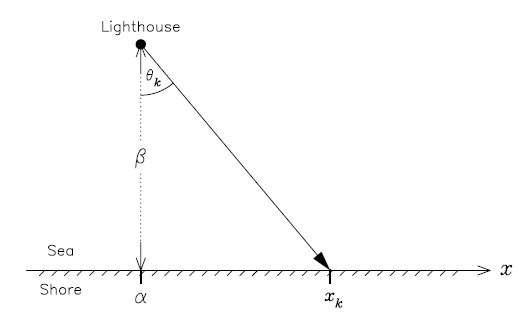](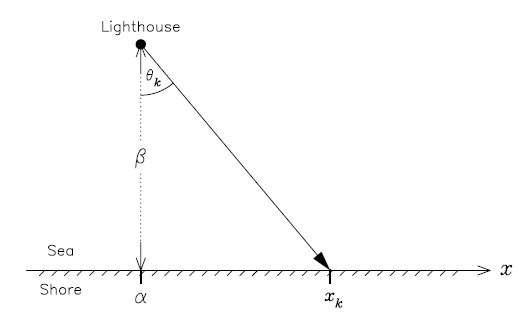)



##### 1) Compute the probability distribution $p(x | x_0,y_0)$ of observing a flash at the point $x$ along the shore depending on the distance of the lighthouse from the shore $y_0$ and its position along the shore $x_0$.

#### Recall: Maximum likelihood estimator


The maximum likelyhood estimator gives us the parameters of the distribution that make the observation of a given set of data $\{x_i\}$ most likely. Assuming that the observations are independent, and that the probability of observing $x$ is given by the probability distribution $P(x|\lambda)$
$$
\widehat{\lambda}_{ML}=argmax_{\lambda}\prod_i P(x_i|\lambda)=argmax_{\lambda}\left(\sum_i\log(P(x_i|\lambda))\right)
$$

There are two additional quantities that will be important for our purpuse. The first one is called the score
$$
S(x,\lambda)=\partial_\lambda L(x|\lambda),
$$
where we introduced Log-likelyihood $L(x|\lambda)=\log P(x|\lambda)$. Importantly, the average of $\mathbb{E}[S(x,\lambda)]=0$. The second one is the Fisher information, which corresponds to the variance of the score
$$
I(\lambda)=\mathbb{E}[S(x|\lambda)^2].
$$
In case of $N$ independent events we simply have
$$
I_N(\lambda)=\sum_{i=1}^N I(\lambda) = NI(\lambda).
$$

### Consider the case with $x_0=20$, $y_0=15$.

#### Let us first assume that we know the value of $x_0$ but not the one of $y_0$. 

Then, we wish to find

$$p(y_0 | \{x_k\}, x_0)$$

Using Bayes’ theorem:

$$p(y_0 | \{x_k\}, x_0) = \frac{p(y_0 , \{x_k\}, x_0)}{p(\{x_k\}, x_0)} = \frac{p(\{x_k\} | y_0, x_0)p(y_0 | x_0)p(x_0)}{p(\{x_k\} | x_0)p(x_0)}\propto p(\{x_k\} | y_0, x_0) p(y_0)$$

where the last step comes from the fact that  $y_0 \perp x_0$, and so we have $p(y_0 | x_0) = p(y_0)$.
The most intuitive prior $p(y_0)$ when we don't have additional information is the one which is uniform over a large enough segment $[y_{min}, y_{max}]$, i.e. $p(y_0) = 1/(y_{max}-y_{min})$

Even if this seems to be a good choice in general, we will show that there exist other priors that lead to a better result.
For the data likelihood $p(\{x_k\} | y_0, x_0)$ we consider that each datum $x_k$ is i.i.d., so:

$$p(\{x_k\} | y_0, x_0) = \prod_{k=1}^N p(x_k | y_0, x_0)$$

And since the prior for $y_0$ is uniform, we finally get:

$$p(y_0 | \{x_k\}, x_0) \propto \prod_{k=1}^N p(x_k | y_0, x_0)$$

Therefore, considering a uniform prior, maximizing the posterior coincides with maximizing the Log-likelihood $L(\{x_k\} | x_0,y_0)$ 

##### We now make an experiment, by generating $N=100$ samples and plotting the dependence of the Log-likelyhood as a function of $y_0$. 

In [69]:
import numpy as np
np.random.seed(123456) # we set the seed of the random generator

First we define the function `loglh` to compute the 
log-likelihood for a set of $N$ instances $x$, given the parameters $x_0$ and $y_0$.

In [70]:
def loglh(x0,y0,x):
  logl=0
  for i in x: logl+=np.log(y0/(y0**2+(i-x0)**2)/np.pi)
  return logl

To generate the set of observations $\{x_k\}$, since we know they follow a Cauchy distribution, we can use a built-in function of the `scipy` package

In [71]:
from scipy.stats import cauchy

N=100
x0_true=20
y0_true=15

x=cauchy.rvs(loc=x0_true,scale=y0_true,size=N) # rvs stands for Random Variates, i.e. particular outcomes of a random variable

Finally we can compute the Log-likelihood for a range of values of $y_0$ around the true value $y_0^*$ and plot its behaviour

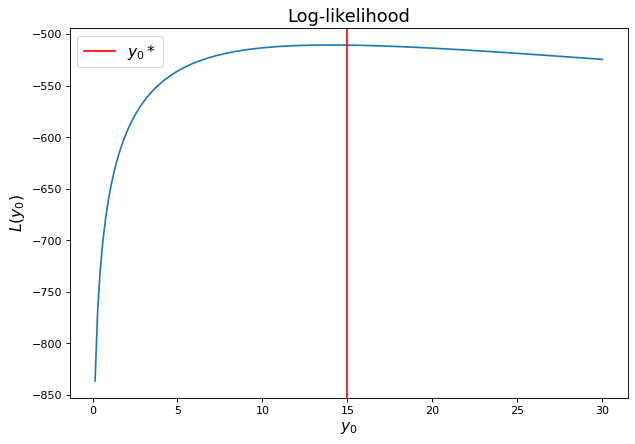

In [72]:
import matplotlib.pyplot as plt

tab_y0=np.linspace(0,30,200)[1:] # we generate a table for y0 
logl_y0=np.array([loglh(x0_true,y0,x) for y0 in tab_y0]) # we compute the loglh for each value in the table

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$L(y_0)$', fontsize=14)
plt.plot(tab_y0,logl_y0)
plt.axvline(y0_true,color="r",label='$y_0*$')
plt.legend(fontsize=14);

We see that there’s a maximum near the true value, but it's not easy to see since we are working with logs.

However, if we compute the exponential we can get the shape of the posterior $p(y_0 | \{x_k\}, 20)$ (to get the true posterior – a distribution – we would need to find the normalizing factor, which is irrelevant here)

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\1677683297.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)


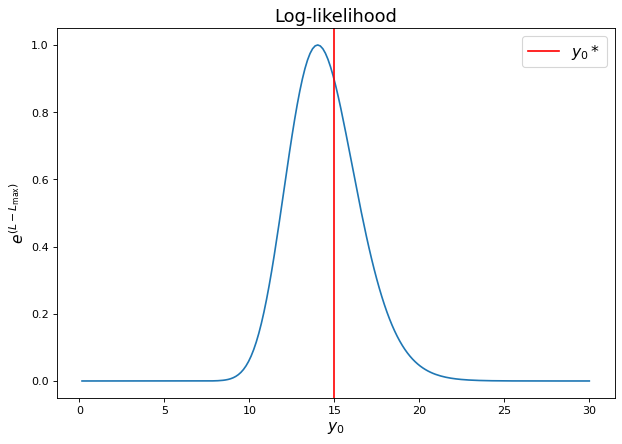

In [73]:
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
plt.plot(tab_y0,np.exp(logl_y0-max(logl_y0)))
plt.axvline(y0_true,color="r",label='$y_0*$')
plt.legend(fontsize=14)

##### Now we compute the maximum likelihood estimator for $y_0$, that we call $\widehat{y}_{0,ML}$, and we see how it behaves when we vary the number of data in the sample $x$

A good way to compute the maximum of a function is to use a function from `scipy.optimize` called `minimize`

In [74]:
%%time
from scipy.optimize import minimize

tab_N = np.logspace(0, 4, num=10, base=10)
y0_ML=[]
for N in tab_N:
  x=cauchy.rvs(loc=x0_true,scale=y0_true,size=int(N))
  y0_guess = np.random.uniform(0,30) # we have to give a guess for the minimizer algorithm to start
  optimum = minimize(lambda y0:-loglh(x0_true,y0,x),y0_guess, method='Nelder-Mead')
  y0_ML.append(optimum.x)

CPU times: total: 1.53 s
Wall time: 3.53 s


<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\2708132329.py:2: SyntaxWarning: invalid escape sequence '\w'
  plt.title('$\widehat{y}_{0,ML}$', fontsize=16)


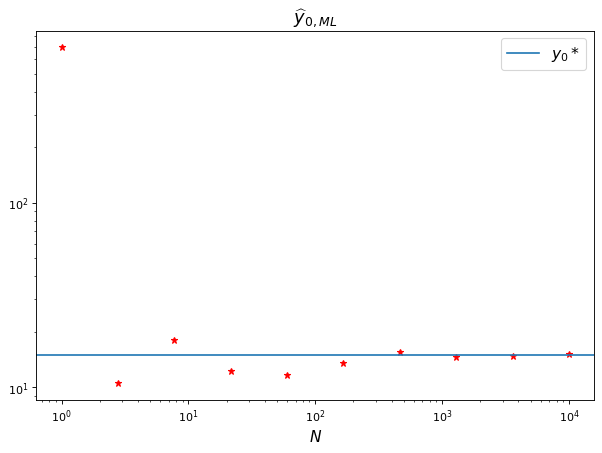

In [75]:
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('$\widehat{y}_{0,ML}$', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.plot(tab_N,y0_ML,"*",color='r')
plt.axhline(y0_true, label="$y_0*$")
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=14);

#### 2) Now do the same, but in the case in which we know $y_0 = 15$ but we do not know $x_0$, that is again $20$:
* Generate $N=100$ samples Cauchy-distributed according to the same parameters $x_0$ and $y_0$
* Plot  the Log-likelihood for a range of values of $x_0$ around the true value $x_0^*$
* Compute the maximum likelihood estimator for $x_0$ , that we call $\widehat{x}_0$ , and see how it behaves for $N\in[1,10^4]$




In [76]:
#generate 100 Cauchy-distributed samples
N = 100
x = cauchy.rvs(loc= x0_true, scale = y0_true, size =int(N))

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\3576187667.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)


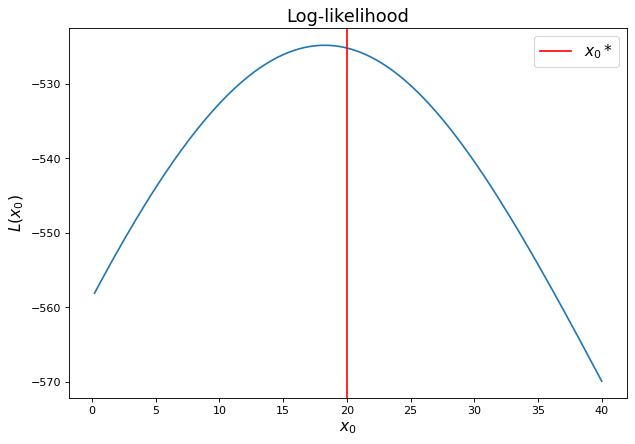

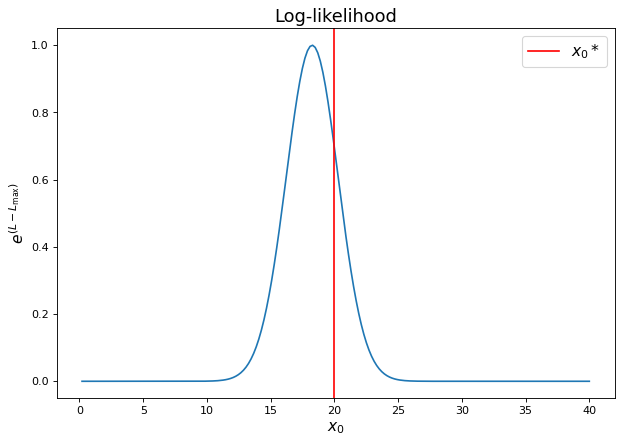

In [77]:
#plot log likelhood
import matplotlib.pyplot as plt

tab_x0=np.linspace(0,40,200)[1:] # we generate a table for x0 
logl_x0=np.array([loglh(x0,y0_true,x) for x0 in tab_x0]) # we compute the loglh for each value in the table

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$L(x_0)$', fontsize=14)
plt.plot(tab_x0,logl_x0)
plt.axvline(x0_true,color="r",label='$x_0*$')
plt.legend(fontsize=14)

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
plt.plot(tab_x0,np.exp(logl_x0-max(logl_x0)))
plt.axvline(x0_true,color="r",label='$x_0*$')
plt.legend(fontsize=14)

<>:16: SyntaxWarning: invalid escape sequence '\w'
<>:16: SyntaxWarning: invalid escape sequence '\w'
C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\3028479943.py:16: SyntaxWarning: invalid escape sequence '\w'
  plt.title('$\widehat{x}_{0,ML}$', fontsize=16)


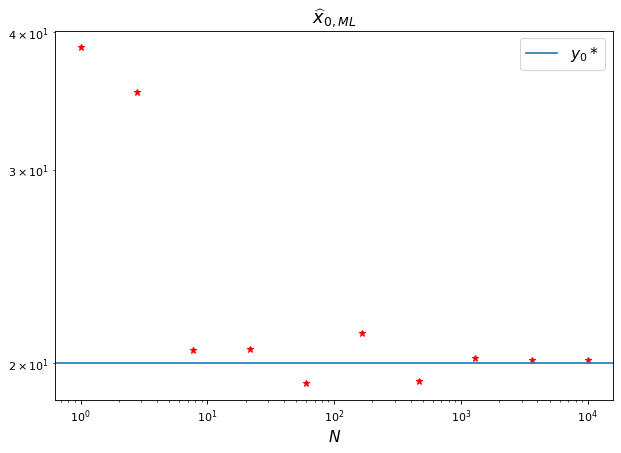

In [78]:
#compute the maximum likelhood estimator 

from scipy.optimize import minimize

tab_N = np.logspace(0, 4, num=10, base=10)
x0_ML=[]
for N in tab_N:
  x=cauchy.rvs(loc=x0_true,scale=y0_true,size=int(N))
  x0_guess = np.random.uniform(0,40) # we have to give a guess for the minimizer algorithm to start
  optimum = minimize(lambda x0:-loglh(x0,y0_true,x),x0_guess, method='Nelder-Mead')
  x0_ML.append(optimum.x)
  
  
#plot the values
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('$\widehat{x}_{0,ML}$', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.plot(tab_N,x0_ML,"*",color='r')
plt.axhline(x0_true, label="$y_0*$")
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=14);

#### 3) Now, after having generated data for N in $[1,10^7]$, try to compute the mean $\left<x\right>$ for each sample as a function of $N$. What do you observe? What about the median?

In [79]:
#calculate the mean 
tab_N = np.logspace(0, 7, num=100, base=10)
average=[]
median_x = []
for N in tab_N:
  x=cauchy.rvs(loc=x0_true,scale=y0_true,size=int(N))
  average.append(np.mean(x))
  median_x.append(np.median(x))
  
  
print(average)
print(median_x)

[-28.44039960953708, 10.659925034122178, 7.3421603286103, 37.91509989992682, 10.403330132921488, 11.378935768829457, 2.109684151397273, 28.056585540048236, 8.271444863049709, 30.670839055476176, 23.44752787411977, 40.530504459610334, 5.2193582922644675, -50.9830457259496, 113.83326556626861, 23.316780573273373, 2591.663105717256, -100.68250415611422, -5.795682760042708, 30.18926552177202, -22.932227283908723, -31.140957731053795, 23.172964522638644, 96.8792196041121, -4.5790824562655255, 23.557532663676138, -353.4819638764487, 8.75321080082504, 27.757415092536462, 12.550018274050586, -9.818922832948903, 46.34356362100725, 30.358032872453492, 2958.121839631936, 72.94423653440131, -5.812253722815515, -3.618644184800176, -21.811273540869415, 25.198189817316788, 1.631115315826086, -70.26661862051793, 22.152581419496947, 10.783469712404237, 14.671016880166754, 16.102422455312517, 30.648919354697977, -3.377025108353682, 52.36845774711165, -20.81866522435085, 24.64765828789448, -6.80896463990

To understand what I acluclated, I plot the average and see how and if they are close to each

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\1351407537.py:2: SyntaxWarning: invalid escape sequence '\w'
  plt.title('$\widehat{x}_{0,ML}$', fontsize=16)


(-200.0, 200.0)

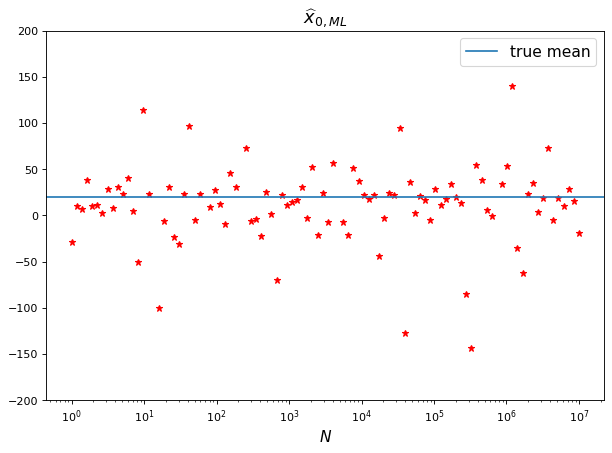

In [80]:
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('$\widehat{x}_{0,ML}$', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.plot(tab_N,average,"*",color='r')
plt.axhline(x0_true, label="true mean")
plt.xscale("log")
plt.legend(fontsize=14)
plt.ylim(-200,200)


The mean does not converge to any value, but this is expected as x are distributed according to CAuchy distribution, which has not a defined mean

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\3899702540.py:2: SyntaxWarning: invalid escape sequence '\w'
  plt.title('$\widehat{x}_{0,ML}$', fontsize=16)


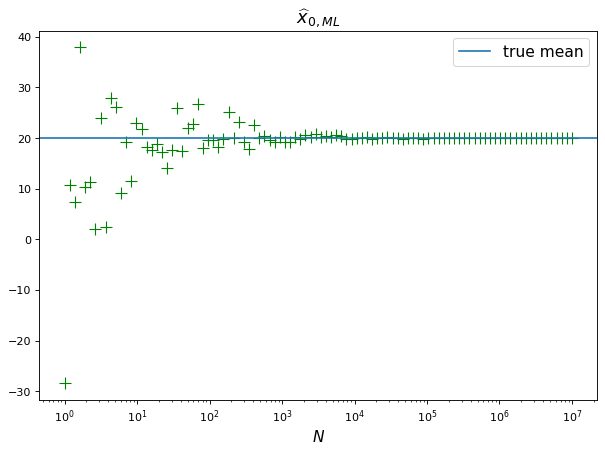

In [81]:
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('$\widehat{x}_{0,ML}$', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.plot(tab_N, median_x, "+", color='g', markersize=10, linewidth=2)
plt.axhline(x0_true, label="true mean")
plt.xscale("log")
plt.legend(fontsize=14)

Insread, it is possible to see the median is converging

## MSE: which estimator is the best?

First of all, let's recall the definition:

**Mean Squared Error**: The mean square error (MSE) is the expectation
value of the square of the difference beween the estimator and the true value of parameter.

$$MSE(\widehat{\lambda};\lambda) \equiv \mathop{\mathbb{E}_{\widehat{\lambda}}}\big[ (\widehat{\lambda} - \lambda)^2 \big]$$

#### **FISHER INFORMATION**

As we recalled earlier, for $N$ independent events we have
$$
I_N(\lambda)=\sum_{i=1}^N I(\lambda) = NI(\lambda).
$$

Therefore for our problem

$$
I_N(x_0, y_0) = N \mathbb{E}_x[S(x|x_0)^2] = -N \mathbb{E}_x\begin{bmatrix}\frac{\partial^2 L}{\partial x_0^2} & \frac{\partial^2 L}{\partial x_0\partial y_0}\\ \frac{\partial^2 L}{\partial y_0\partial x_0} & \frac{\partial^2 L}{\partial y_0^2}\end{bmatrix}
$$

And after a bit of computations, and a little help from [wolfram alpha](https://www.wolframalpha.com/calculators/integral-calculator/), one finds that if $x \in(-\infty,+\infty)$ then the Fisher information is

$$I_N(x_0, y_0) =\begin{bmatrix}\frac{N}{2y_0^2} & 0\\0 & \frac{N}{2y_0^2}\end{bmatrix} = \frac{N}{2y_0^2} \mathbb{I}_2$$

And therefore

*   $\det [I_N(x_0,y_0)] = \frac{N^2}{4y_0^4}$
*   $I_N(y_0|x_0) = \frac{N}{2y_0^2}$
*   $I_N(x_0|y_0) = \frac{N}{2y_0^2} = \text{const}$



#### **CRAMÉR-RAO BOUND**

For **unbiased estimators**, as for example the maximum likelihood one, the CRB tells us that for each parameter $\lambda_i$ we have

$$MSE(\widehat{\lambda_i}_{ML};\lambda_i) \geq \{[I_N(\mathbf{\lambda})]^{-1}\}_{ii}$$

where $I_N(\mathbf{\lambda})$ is the Fisher information.

#### **JEFFREYS PRIOR**

In general, the Jeffreys prior is given by

$$p(\mathbf{\lambda}) \propto \sqrt{\det[I_N(\mathbf{\lambda})]}$$

#### Consider the case in which $x_0=20$, and we know its value, and we want to estimate $y_0$

In this case the Cramér-Rao bound tells us:

$$MSE(\widehat{y_0}_{ML};y_0) \geq \frac{2y_0^2}{N}$$

While the Jeffreys prior, normalized, is $p(y_0) = \frac{1}{y_0}$ and thus the posterior 

$$p(y_0 | \{x_k\}, x_0) \propto p(\{x_k\} | y_0, x_0) p(y_0) \propto \frac{1}{y_0}\prod_{i=1}^{N}  \frac{1}{\pi} \frac{y_0}{(x_i-x_0)^2 + y_0^2}$$

Now let's compute the MSE on the likelihood estimator and on the one found with Jeffreys prior, and compare the two with the Cramér-Rao bound

Firstly, we define the function to compute the posterior with Jeffreys prior

In [82]:
#returns log posteriori, Sum of log prior and log likelhood
def jeffpost(x0,y0,x):
  jp= - np.log(y0) #prior
  for i in x: jp+=np.log(y0/((y0**2+(i-x0)**2)*np.pi))
  return jp

Since we are going to use it a lot of times, we define a new function `minimizer_y0` to compute the estimators given a function to minimize  

In [83]:
def minimizer_y0(func,y0, N_rep, N):
  y0_est=np.zeros(N_rep)  # np array that will store the estimated y0 for each repetition
  for ir in range(N_rep):
    x=cauchy.rvs(loc=x0_true,scale=y0,size=N)   # Sample N points in the cauchy distribution
    y0_est[ir] = minimize(lambda y:-func(x0_true,y,x),np.random.uniform(0,30), method='Nelder-Mead').x  # take the y0 maximizing the objective function
  return y0_est

To estimate the $MSE$, i.e. to compute the expected value over $\widehat{\lambda}$, we need to repeat the estimation $N_{rep}$ times. We will do this for $N_{est} = 15$ values of $y_0$ in $(0,1]$, starting with $N=10$ and $N_{rep} = 500$

In [84]:
N_est=15
tab_y0=np.linspace(0,1,N_est+1)[1:]
N = 10
N_rep = 500

In [85]:
y0_ML= np.array([ minimizer_y0(loglh,y0, N_rep, N) for y0 in tab_y0])
y0_J= np.array([ minimizer_y0(jeffpost,y0, N_rep, N) for y0 in tab_y0])

C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\984721421.py:3: RuntimeWarning: invalid value encountered in log
  for i in x: logl+=np.log(y0/(y0**2+(i-x0)**2)/np.pi)
C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\1821928740.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y0_est[ir] = minimize(lambda y:-func(x0_true,y,x),np.random.uniform(0,30), method='Nelder-Mead').x  # take the y0 maximizing the objective function
C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\984721421.py:3: RuntimeWarning: divide by zero encountered in log
  for i in x: logl+=np.log(y0/(y0**2+(i-x0)**2)/np.pi)
C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\3539325595.py:4: RuntimeWarning: invalid value encountered in log
  for i in x: jp+=np.log(y0/((y0**2+(i-x0)**2)*np.pi))
C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\

Now that we have computed $N_{rep}$ estimates for each value of $y_0$ with both methods, we can estimate the $MSE$ and we can use **bootstrap** to give a confidence interval on our estimations

First we define the function `MSE_est`
that, given the array of $N_{rep}$ estimates of $y_0$, returns the estimate of the $MSE$ and its C.I.

In [86]:
from numpy import percentile
from numpy.random import choice

def MSE_est(y0_est,y0):
  N_boot=100
  MSE = (y0_est - np.full(N_rep, y0))**2 #avoid for loops!
  MSE_mean = MSE.mean()
  MSE_boot = choice(MSE,(N_boot,N_rep))
  MSE_boot_mean = MSE_boot.mean(axis=1)
  CI_min = percentile(MSE_boot_mean, [2.5,97.5])[0]
  CI_max = percentile(MSE_boot_mean, [2.5,97.5])[1]

  return MSE_mean, CI_min, CI_max

And now we can compute our estimates for each $y_0$

In [87]:
MSE_ML_10 = np.zeros(N_est)
CI_min_ML_10 = np.zeros(N_est)
CI_max_ML_10 = np.zeros(N_est)
MSE_J_10 = np.zeros(N_est)
CI_min_J_10 = np.zeros(N_est)
CI_max_J_10 = np.zeros(N_est)

for j,y0 in enumerate(tab_y0):
  MSE, CI_min, CI_max = MSE_est(y0_ML[j], y0)
  MSE_ML_10[j] = MSE
  CI_min_ML_10[j] = CI_min
  CI_max_ML_10[j] = CI_max
  MSE, CI_min, CI_max = MSE_est(y0_J[j], y0)
  MSE_J_10[j] = MSE
  CI_min_J_10[j] = CI_min
  CI_max_J_10[j] = CI_max

And compare them to the Cramér-Rao bound

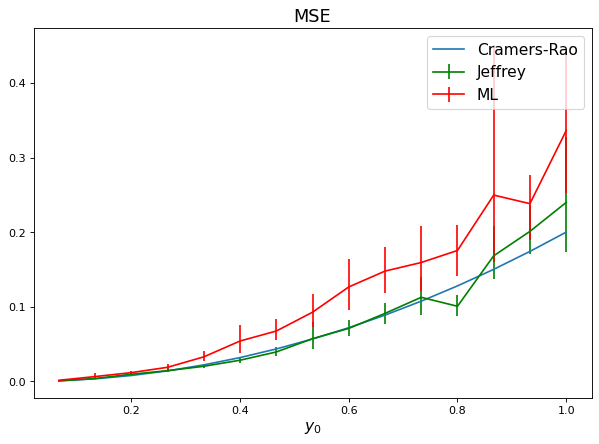

In [88]:
fig = plt.figure(figsize=(9, 6), dpi=80)

plt.title('MSE', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.errorbar(tab_y0,MSE_J_10,yerr=[MSE_J_10-CI_min_J_10, CI_max_J_10-MSE_J_10],marker="",color='g', label='Jeffrey')
plt.errorbar(tab_y0,MSE_ML_10,yerr=[MSE_ML_10-CI_min_ML_10, CI_max_ML_10-MSE_ML_10],marker="",color='r', label='ML')
plt.plot(tab_y0, 2*tab_y0*tab_y0/N, label='Cramers-Rao')
plt.legend(fontsize=14)

#### 4) Now do the same for $N=3$ and $N=50$ and plot all in a single graph, to see what happens when we vary $N$

In [89]:
N1 = 3
N2= 50

y0_ML_3= np.array([ minimizer_y0(loglh,y0, N_rep, N1) for y0 in tab_y0])
y0_J_3= np.array([ minimizer_y0(jeffpost,y0, N_rep, N1) for y0 in tab_y0])

y0_ML_50= np.array([ minimizer_y0(loglh,y0, N_rep, N2) for y0 in tab_y0])
y0_J_50= np.array([ minimizer_y0(jeffpost,y0, N_rep, N2) for y0 in tab_y0])



C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\984721421.py:3: RuntimeWarning: invalid value encountered in log
  for i in x: logl+=np.log(y0/(y0**2+(i-x0)**2)/np.pi)
C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\1821928740.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y0_est[ir] = minimize(lambda y:-func(x0_true,y,x),np.random.uniform(0,30), method='Nelder-Mead').x  # take the y0 maximizing the objective function
C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\984721421.py:3: RuntimeWarning: divide by zero encountered in log
  for i in x: logl+=np.log(y0/(y0**2+(i-x0)**2)/np.pi)
C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\3539325595.py:4: RuntimeWarning: invalid value encountered in log
  for i in x: jp+=np.log(y0/((y0**2+(i-x0)**2)*np.pi))
C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\

In [90]:
MSE_ML_3 = np.zeros(N_est)
CI_min_ML_3 = np.zeros(N_est)
CI_max_ML_3 = np.zeros(N_est)
MSE_J_3 = np.zeros(N_est)
CI_min_J_3 = np.zeros(N_est)
CI_max_J_3 = np.zeros(N_est)

for j,y0 in enumerate(tab_y0):
  MSE, CI_min, CI_max = MSE_est(y0_ML_3[j], y0)
  MSE_ML_3[j] = MSE
  CI_min_ML_3[j] = CI_min
  CI_max_ML_3[j] = CI_max
  MSE, CI_min, CI_max = MSE_est(y0_J_3[j], y0)
  MSE_J_3[j] = MSE
  CI_min_J_3[j] = CI_min
  CI_max_J_3[j] = CI_max

In [91]:
MSE_ML_50 = np.zeros(N_est)
CI_min_ML_50 = np.zeros(N_est)
CI_max_ML_50 = np.zeros(N_est)
MSE_J_50 = np.zeros(N_est)
CI_min_J_50 = np.zeros(N_est)
CI_max_J_50 = np.zeros(N_est)

for j,y0 in enumerate(tab_y0):
  MSE, CI_min, CI_max = MSE_est(y0_ML_50[j], y0)
  MSE_ML_50[j] = MSE
  CI_min_ML_50[j] = CI_min
  CI_max_ML_50[j] = CI_max
  MSE, CI_min, CI_max = MSE_est(y0_J_50[j], y0)
  MSE_J_50[j] = MSE
  CI_min_J_50[j] = CI_min
  CI_max_J_50[j] = CI_max

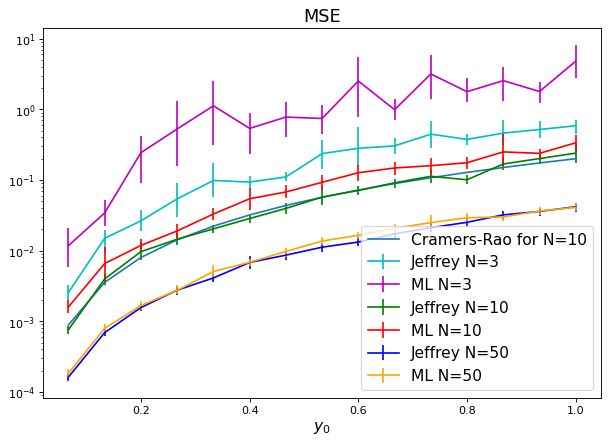

In [92]:
fig = plt.figure(figsize=(9, 6), dpi=80)

plt.title('MSE', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)


# Jeffrey N=3
plt.errorbar(tab_y0, MSE_J_3, 
             yerr=[np.abs(MSE_J_3 - CI_min_J_3), np.abs(CI_max_J_3 - MSE_J_3)], 
             marker="", color='c', label='Jeffrey N=3')

# ML N=3
plt.errorbar(tab_y0, MSE_ML_3, 
             yerr=[np.abs(MSE_ML_3 - CI_min_ML_3), np.abs(CI_max_ML_3 - MSE_ML_3)], 
             marker="", color='m', label='ML N=3')

# Jeffrey N=10
plt.errorbar(tab_y0, MSE_J_10, 
             yerr=[MSE_J_10 - CI_min_J_10, CI_max_J_10 - MSE_J_10], 
             marker="", color='g', label='Jeffrey N=10')

# ML N=10
plt.errorbar(tab_y0, MSE_ML_10, 
             yerr=[np.abs(MSE_ML_10 - CI_min_ML_10), np.abs(CI_max_ML_10 - MSE_ML_10)], 
             marker="", color='r', label='ML N=10')

plt.plot(tab_y0, 2 * tab_y0 * tab_y0 / N, label='Cramers-Rao for N=10')


# Jeffrey N=50
plt.errorbar(tab_y0, MSE_J_50, 
             yerr=[np.abs(MSE_J_50 - CI_min_J_50), np.abs(CI_max_J_50 - MSE_J_50)], 
             marker="", color='b', label='Jeffrey N=50')

# ML N=50
plt.errorbar(tab_y0, MSE_ML_50, 
             yerr=[np.abs(MSE_ML_50 - CI_min_ML_50), np.abs(CI_max_ML_50 - MSE_ML_50)], 
             marker="", color='orange', label='ML N=50')

# Legend
plt.legend(fontsize=14)
plt.yscale('log')
plt.show()



The higher the number N, the closer the result are to the Cramer-Rao bound

#### 5) Now consider the case in which we know the value of $y_0=15$ but not $x_0$:

* What Jeffreys prior tells us in this case?
* Compare the MSE on the maximum likelihood and the median estimators for values of $x_0$ in $[-1,1]$ and compare both to the Cramér-Rao bound
* Repeat the process for $N=3,50$ as before and compare the results

In [130]:
def minimizer_x0(func,x0, N_rep, N):
  x0_est=np.zeros(N_rep)  # np array that will store the estimated y0 for each repetition
  for ir in range(N_rep):
    y=cauchy.rvs(loc=x0,scale=y0_true,size=N)   # Sample N points in the cauchy distribution
    x0_est[ir] = minimize(lambda x:-func(x0,y0_true,y),np.random.uniform(-30,30), method='Nelder-Mead').x  # take the y0 maximizing the objective function
  return x0_est

C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\467133134.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x0_est[ir] = minimize(lambda x:-func(x0,y0_true,y),np.random.uniform(-30,30), method='Nelder-Mead').x  # take the y0 maximizing the objective function


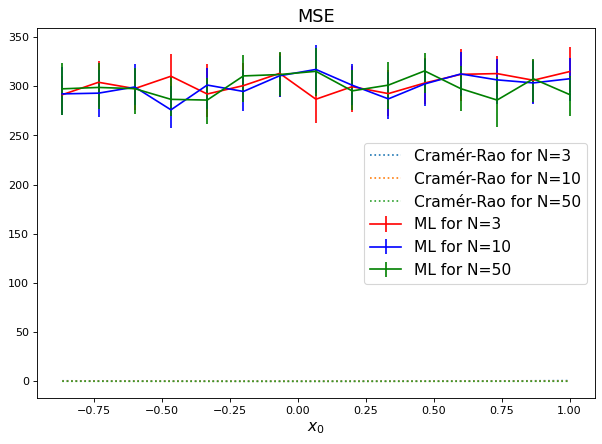

In [142]:
# List of N values
N_values = [3, 10, 50]

# Initialize dictionaries to store results for each N
MSE_ML = {}
CI_min_ML = {}
CI_max_ML = {}

# Ensure tab_x0 and N_est have the correct relationship
N_est = 15  # Ensure N_est matches the length of tab_x0
tab_x0 = np.linspace(-1, 1, N_est + 1)[1:]  # tab_x0 from -1 to 1, with N_est values
N_rep = 500  # Number of repetitions

# Loop over different N values
for i, N in enumerate(N_values):
    # Initialize arrays to store results for each N
    MSE_ML[i] = np.zeros(N_est)
    CI_min_ML[i] = np.zeros(N_est)
    CI_max_ML[i] = np.zeros(N_est)

    # Compute x0 estimates for ML for the current N
    x0_ML = np.array([minimizer_x0(loglh, x0, N_rep, N) for x0 in tab_x0])

    # Compute MSE and confidence intervals for each x0
    for j, x0 in enumerate(tab_x0):
        try:
            # MSE estimate and bootstrapped confidence intervals
            MSE, CI_min, CI_max = MSE_est(x0_ML[j], x0)
            MSE_ML[i][j] = MSE
            CI_min_ML[i][j] = CI_min 
            CI_max_ML[i][j] = CI_max
        except IndexError as e:
            print(f"IndexError: {e} for j={j} and N={N}")
        except Exception as e:
            print(f"Error: {e} for j={j} and N={N}")

# Create the plot
fig = plt.figure(figsize=(9, 6), dpi=80)
plt.title('MSE', fontsize=16)
plt.xlabel('$x_0$', fontsize=14)

# Define colors for different N values
colors = ['r', 'b', 'g']

# Loop to plot the results for each N
for i, N in enumerate(N_values):
    plt.errorbar(tab_x0, MSE_ML[i], 
                 yerr=[np.abs(MSE_ML[i] - CI_min_ML[i]), np.abs(CI_max_ML[i] - MSE_ML[i])],
                 marker="", color=colors[i], label=f'ML for N={N}')
    # Plot Cramér-Rao bound for the given N
    plt.plot(tab_x0, 2 * tab_x0 * tab_x0 / N, label=f'Cramér-Rao for N={N}', linestyle='dotted')

# Show legend and plot
plt.legend(fontsize=14)
plt.show()


Jeffrey prior is not dependent on x0 but only on y0, thus there is no point in coputing it as it would be constant

## Estimate both the parameters
Now we consider again the case with $y_0=15$, $x_0=20$, but let's assume that we do not know either $x_0$, $y_0$. 

If we assume that both $x_0$ and $y_0$ are uniform over some interval, then the posterior is simply proportional to the likelihood:
$$p(x_0, y_0 | \{x_k\}) \propto p(\{x_k\} | x_0, y_0)$$

We make an experiment, by generating $N=100$ samples and we plot the dependence of log-likelyhood as a function of $x_0$ and $y_0$. 

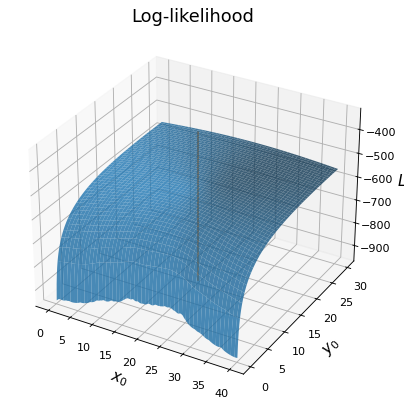

In [132]:
from mpl_toolkits.mplot3d import Axes3D
x0_true=20
y0_true=15
N=100
tab_y0=np.linspace(0,30,201)[1:]
tab_x0=np.linspace(0,40,200)
x=cauchy.rvs(loc=x0_true,scale=y0_true,size=N)
#logl=[[loglh(x0,y,x) for y in taby0] for x0 in tabx0]

fig = plt.figure(figsize=(9,6), dpi=80)
ax = fig.add_subplot(111, projection='3d') #we create the 3d axis
plt.title('Log-likelihood', fontsize=16)
X, Y = np.meshgrid(tab_x0,tab_y0)
zs = np.array(loglh(np.ravel(X), np.ravel(Y),x))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.8)
ax.plot( np.full(1000, x0_true), np.full(1000, y0_true), np.linspace(max(zs)+200, min(zs), 1000))

ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)
ax.set_zlabel('$L$', fontsize=14)

plt.show()


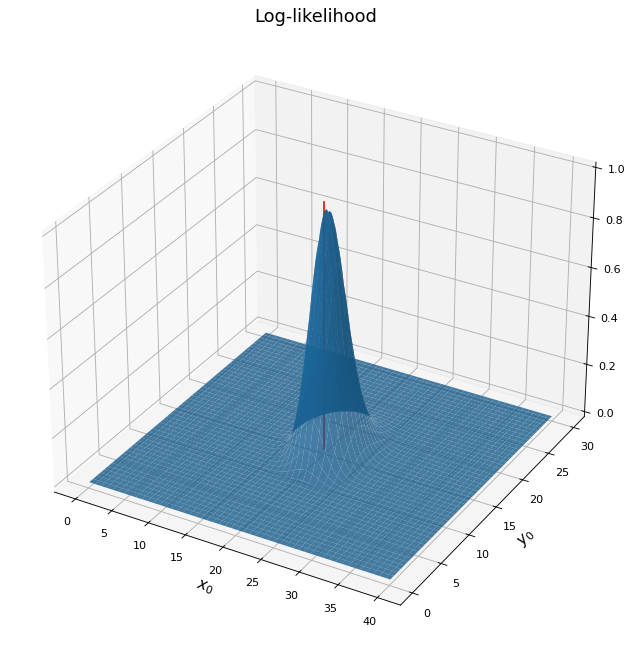

In [133]:
fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
plt.title('Log-likelihood', fontsize=16)
X, Y = np.meshgrid(tab_x0,tab_y0)
zslog = np.array(np.exp(loglh(np.ravel(X), np.ravel(Y),x) - max(zs)))
Z = zslog.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.8)
ax.plot( np.full(1000, x0_true), np.full(1000, y0_true), np.linspace(0,1, 1000),color='r')

ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)


plt.show()


##### And finally we compute the ML estimator of both the parameters

In [134]:
%%time
tab_N= np.logspace(0, 4, base=10, num=20)
y0_ML=[]
x0_ML=[]

def f(params):
  x0,y0 = params
  return -loglh(x0,y0,x)

for N in tab_N:
  x=cauchy.rvs(loc=x0_true,scale=y0_true,size=int(N))
  xy0 = (np.random.uniform(0,40),np.random.uniform(0,30))
  #bounds = [(-40,40),(0,50)]
  optimum = minimize(f,xy0, method='Nelder-Mead')
  x0_ML.append(optimum.x[0])
  y0_ML.append(optimum.x[1])

C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\984721421.py:3: RuntimeWarning: invalid value encountered in log
  for i in x: logl+=np.log(y0/(y0**2+(i-x0)**2)/np.pi)


CPU times: total: 2.5 s
Wall time: 2.98 s


20 20 20


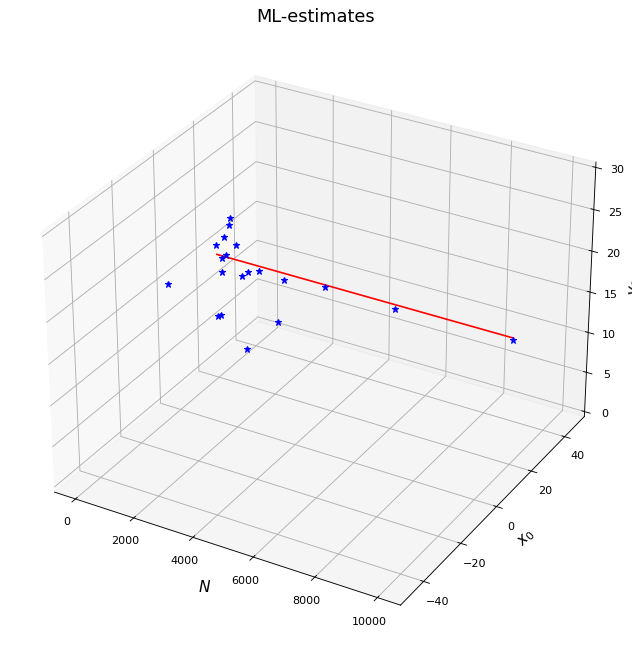

In [136]:
fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
sizes = np.array([int(N) for N in tab_N])
print(len(sizes),len(x0_ML), len(y0_ML))
plt.title('ML-estimates', fontsize=16)
ax.plot( range(10000), np.full(10000, x0_true), np.full(10000, y0_true),color='r')
ax.plot(tab_N, x0_ML, y0_ML, marker="*",color='b', ls='None')
ax.set_xlabel('$N$', fontsize=14)
ax.set_ylabel('$x_0$', fontsize=14)
ax.set_zlabel('$y_0$', fontsize=14)

ax.set_ylim(-50,50)
ax.set_zlim(0,30)

plt.show()

## Evaluated!

#### 6) Take the dataset you find in `where_is_the_light.npy` file and import it into a numpy array. It contains $N=10000$ Cauchy-distributed samples with unknown parameters $x_0$ and $y_0$. Using the techniques previously showed, give an estimate (with a confidence interval) of the true value of $x_0$ and $y_0$. You are guaranteed that $x_0 \in [-100,100]$ and $y_0 \in [0,30]$. *Bonus*: which one is better between Jefferys prior and uniform prior?

In [171]:
#import dataset
data = np.load('where_is_the_light.npy')

Text(0.5, 0, '$L$')

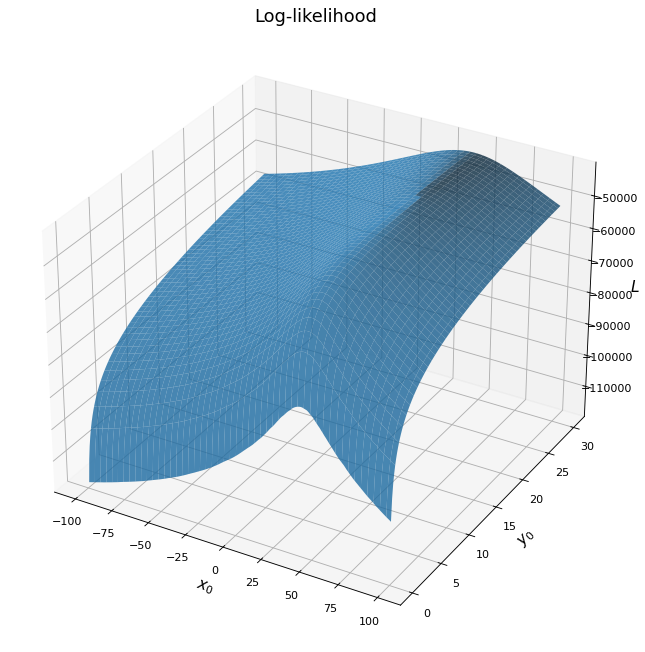

In [172]:
tab_x0 = np.linspace(-100,100,200)
tab_y0 = np.linspace(0,30,201)[1:]
#plot log likelhood as a function of x0 and y0
fig = plt.figure(figsize=(12,10), dpi=80)
ax = fig.add_subplot(111, projection='3d') #we create the 3d axis
plt.title('Log-likelihood', fontsize=16)
X, Y = np.meshgrid(tab_x0,tab_y0)
zs = np.array(loglh(np.ravel(X), np.ravel(Y),data))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.8)
ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)
ax.set_zlabel('$L$', fontsize=14)


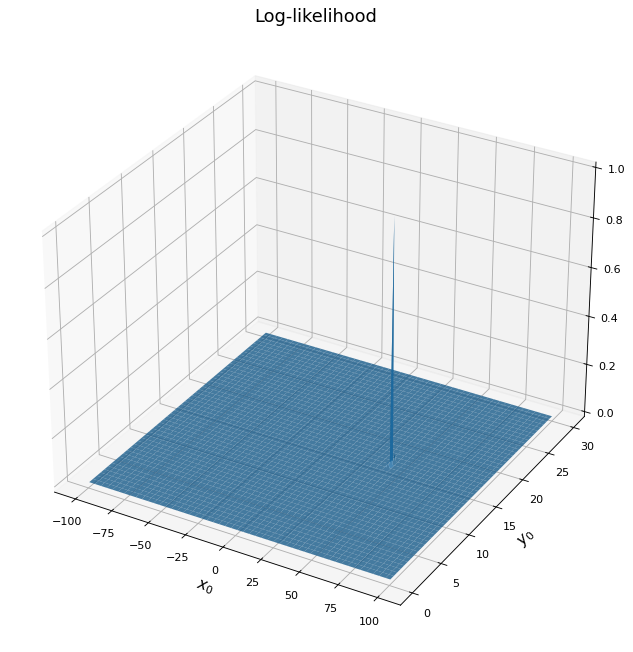

In [173]:
#plot in exponential form to better visualize the results
fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
plt.title('Log-likelihood', fontsize=16)
X, Y = np.meshgrid(tab_x0,tab_y0)
zslog = np.array(np.exp(loglh(np.ravel(X), np.ravel(Y),data) - max(zs)))
Z = zslog.reshape(X.shape)
ax.plot_surface(X, Y, Z, alpha=0.8)
ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)
plt.show()

In [174]:
#compute ML for x and y
def f(params):
  x0,y0 = params
  return -loglh(x0,y0,data)

xy0 = (np.random.uniform(-100,100),np.random.uniform(0,30))
optimum = minimize(f,xy0, method='Nelder-Mead')
x0_ML = optimum.x[0]
y0_ML = optimum.x[1]
print(f'The value for x0 estimated with ML is {x0_ML}')
print(f'The value for y0 estimated with ML is {y0_ML}')

The value for x0 estimated with ML is 42.850128135708076
The value for y0 estimated with ML is 15.746180513533613


Superimpose on the same graph the lg likelhood and a line in correspondenca of the estimated x0 and y0 and see if the maximum is corresponidng to these coordinates

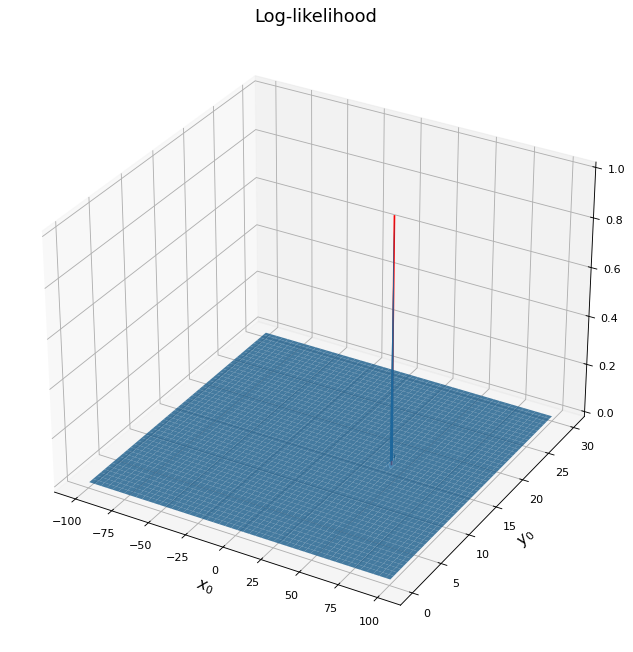

In [176]:
fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
plt.title('Log-likelihood', fontsize=16)
X, Y = np.meshgrid(tab_x0,tab_y0)
zslog = np.array(np.exp(loglh(np.ravel(X), np.ravel(Y),data) - max(zs)))
Z = zslog.reshape(X.shape)
ax.plot_surface(X, Y, Z, alpha=0.8)
ax.plot( np.full(10000, x0_ML), np.full(10000, y0_ML), np.linspace(0,1, 10000),color='r')
ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)
plt.show()

In [186]:
# Number of bootstrap iterations and dataset length
n_iterations = 100
sample_size = len(data)

# Set random seed for reproducibility
np.random.seed(123)

# Resample the original dataset with replacement
bootstrap_samples = [np.random.choice(data, sample_size, replace=True) for _ in range(n_iterations)]

# Prepare empty lists to store the estimates of x0 and y0
estimated_x0 = []
estimated_y0 = []

# Function to minimize, returns negative log-likelihood
def objective(params, data_sample):
    x0_val, y0_val = params
    return -loglh(x0_val, y0_val, data_sample)


# Iterate over each bootstrapped dataset
for sample in bootstrap_samples:
    # Random initialization for x0 and y0
    initial_guess = (np.random.uniform(-100, 100), np.random.uniform(0, 30))
    
    # Minimize the negative log-likelihood using Nelder-Mead method
    result = minimize(objective, initial_guess, args=(sample,), method='Nelder-Mead')
    
    if result.success:
        # Store the MLE estimates for x0 and y0
        estimated_x0.append(result.x[0])
        estimated_y0.append(result.x[1])
        
# Calculate confidence intervals for x0 and y0
x0_est_CI = np.percentile(estimated_x0, [2.5, 97.5])
y0_est_CI = np.percentile(estimated_y0, [2.5, 97.5])

# If x0_ML and y0_ML are already known, calculate relative percentage bounds
lb_x0 = (x0_ML - x0_est_CI[0])/x0_ML*100
ub_x0 = (x0_est_CI[1] - x0_ML)/x0_ML*100

lb_y0 = (y0_ML - y0_est_CI[0])/y0_ML*100
ub_y0 = (y0_est_CI[1] - y0_ML)/y0_ML*100

print(f'The confidence interval for x0 (in %) is [{round(lb_x0,3)},{round(ub_x0,3)}]')
print(f'The confidence interval for y0 (in %) is [{round(lb_y0,3)},{round(ub_y0,3)}]')

# Or print absolute values
print(f'The confidence interval for x0 is [{x0_est_CI[0]},{x0_est_CI[1]}]')
print(f'The confidence interval for y0 is [{y0_est_CI[0]},{y0_est_CI[1]}]')


C:\Users\beagr\AppData\Local\Temp\ipykernel_35832\2259226262.py:9: RuntimeWarning: invalid value encountered in log
  logl += np.log(y0 / (y0**2 + (i - x0)**2))  # Log-likelihood for Cauchy


The confidence interval for x0 (in %) is [1.182,1.168]
The confidence interval for y0 (in %) is [2.381,2.721]
The confidence interval for x0 is [42.343774543856725,43.35073287885536]
The confidence interval for y0 is [15.37128283168072,16.174599408222278]


STILL IN PROGRESS!!

In [185]:
import numpy as np
from scipy.optimize import minimize

# Number of bootstrap iterations and dataset length
n_iterations = 100
sample_size = len(data)

# Set random seed for reproducibility
np.random.seed(123)

# Resample the original dataset with replacement
bootstrap_samples = [np.random.choice(data, sample_size, replace=True) for _ in range(n_iterations)]

# Prepare empty lists to store the estimates of x0 and y0
estimated_x0_j = []
estimated_y0_j = []

def jeffpost(x0, y0, x):
    jp = -np.log(y0)  # Prior
    for i in x:
        jp += np.log(y0 / (np.maximum(y0**2 + (i - x0)**2, 1e-10) * np.pi))
    return -jp  # Return negative log-likelihood for minimization

def jeffrey_oj(params, data_sample):
    x0_val, y0_val = params
    return jeffpost(x0_val, y0_val, data_sample)

# Iterate over each bootstrapped dataset
for sample in bootstrap_samples:
    # Random initialization for x0 and y0
    initial_guess = (np.random.uniform(-100, 100), np.random.uniform(1e-10, 30))  # Avoid zero for y0

    # Set bounds for optimization
    bounds = [(-100, 100), (1e-10, 30)]  # Example bounds for x0 and y0

    # Minimize the negative log-likelihood using L-BFGS-B method
    result_jeff = minimize(jeffrey_oj, initial_guess, args=(sample,), method='L-BFGS-B', bounds=bounds)
    
    if result_jeff.success:
        estimated_x0_j.append(result_jeff.x[0])
        estimated_y0_j.append(result_jeff.x[1])
    else:
        print(f'Optimization failed for sample: {sample}, reason: {result_jeff.message}')

# Calculate confidence intervals using bootstrap estimates
x0_est_CI_j = np.percentile(estimated_x0_j, [2.5, 97.5])
y0_est_CI_j = np.percentile(estimated_y0_j, [2.5, 97.5])

# Calculate relative bounds
lb_x0_j = (x0_ML - x0_est_CI_j[0]) / x0_ML * 100
ub_x0_j = (x0_est_CI_j[1] - x0_ML) / x0_ML * 100

lb_y0_j = (y0_ML - y0_est_CI_j[0]) / y0_ML * 100
ub_y0_j = (y0_est_CI_j[1] - y0_ML) / y0_ML * 100

# Print results
print(f'The confidence interval for x0 (in %) is [{round(lb_x0_j, 3)}, {round(ub_x0_j, 3)}]')
print(f'The confidence interval for y0 (in %) is [{round(lb_y0_j, 3)}, {round(ub_y0_j, 3)}]')

# Or print absolute values
print(f'The confidence interval for x0 is [{x0_est_CI_j[0]}, {x0_est_CI_j[1]}]')
print(f'The confidence interval for y0 is [{y0_est_CI_j[0]}, {y0_est_CI_j[1]}]')


Optimization failed for sample: [34.66033283  7.8331737  47.20766359 ... 34.92699755 37.64307403
 54.58694409], reason: ABNORMAL_TERMINATION_IN_LNSRCH
The confidence interval for x0 (in %) is [1.182, 1.17]
The confidence interval for y0 (in %) is [2.407, 2.715]
The confidence interval for x0 is [42.34368248018397, (43.35157451693693, 2)]
The confidence interval for y0 is [15.367148564026891, (16.173667840239784, 2)]
